In [1]:
import numpy as np
import pandas as pd

In [18]:
column_names = ['user_id', 'item_id', 'rate', 'timestap']

In [27]:
df = pd.read_csv('u.data', delimiter='\t', names=column_names)

In [28]:
df.head()

,user_id,item_id,rate,timestap
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [30]:
titles = pd.read_csv('Movie_Id_Titles')

In [31]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [34]:
df = df.merge(titles, how='inner', on='item_id')

In [35]:
df.head()

,user_id,item_id,rate,timestap,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

In [40]:
df.groupby('title')['rate'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rate, dtype: float64

In [44]:
df['title'].value_counts().head()

Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: title, dtype: int64

In [51]:
ratings = pd.DataFrame(df.groupby('title')['rate'].mean().sort_values(ascending=False))
ratings = pd.concat([ratings, df['title'].value_counts()], axis=1)
ratings.columns = ['rating', 'rate_count']
ratings.head()

,rating,rate_count
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


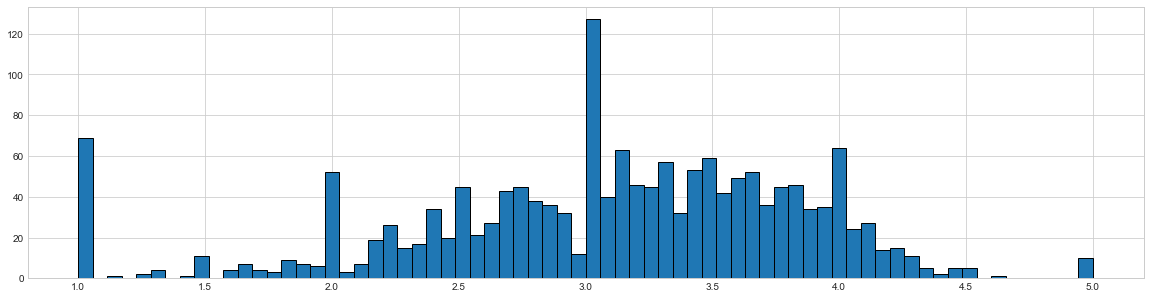

In [66]:
ratings['rating'].hist(bins=70,figsize=(20,5))

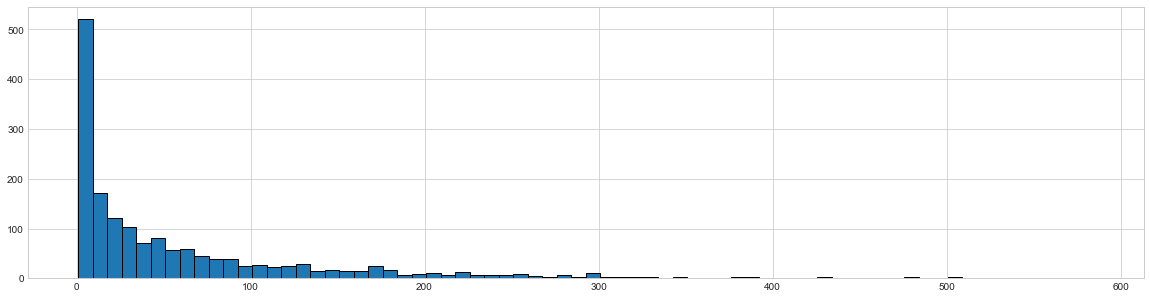

In [65]:
ratings['rate_count'].hist(bins=70,figsize=(20,5))

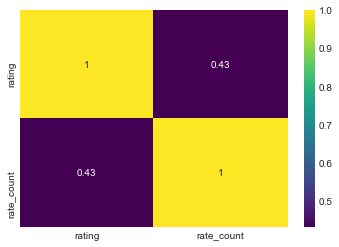

In [68]:
sns.heatmap(ratings.corr(), cmap='viridis', annot=True)

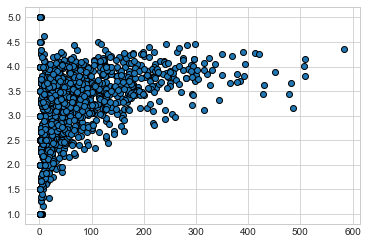

In [72]:
plt.scatter(ratings['rate_count'], ratings['rating'], edgecolors='black')

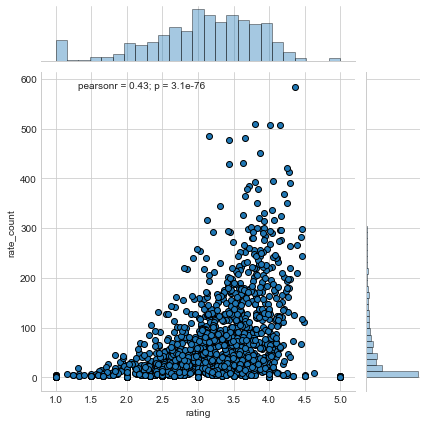

In [75]:
sns.jointplot(data=ratings, x='rating', y='rate_count', joint_kws={'edgecolor':'black'})

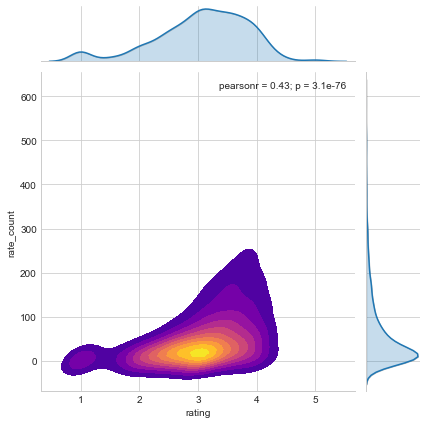

In [82]:
sns.jointplot(data=ratings, x='rating', y='rate_count',kind='kde',joint_kws={'shade_lowest': False, 'cmap':'plasma'})

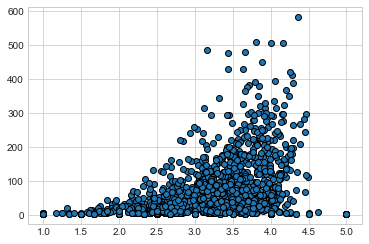

In [73]:
plt.scatter(ratings['rating'], ratings['rate_count'], edgecolors='black')

In [88]:
movie_mat = pd.pivot_table(data=df, columns='title', values='rate', index='user_id')

In [89]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
starwars_corr = pd.DataFrame(movie_mat.corrwith(movie_mat['Star Wars (1977)']).sort_values(ascending=False), columns=['Correlation'])
starwars_corr = starwars_corr.join(ratings['rate_count'])
starwars_corr[starwars_corr['rate_count'] > 100]

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation,rate_count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [115]:
liarliar_corr = pd.DataFrame(movie_mat.corrwith(movie_mat['Liar Liar (1997)']).sort_values(ascending=False), columns=['Correlation'])
liarliar_corr = liarliar_corr.join(ratings['rate_count'])
liarliar_corr[starwars_corr['rate_count'] > 50].head()

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Correlation,rate_count
title,,
Liar Liar (1997),1.000000,485
Casper (1995),0.538816,52
Batman & Robin (1997),0.532858,62
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
